In [5]:
import random as rd
import numpy as np



Esse trabalho têm como intuito de resolver o problema de um algoritmo evolucionário para solucionar o problema das N Rainhas, na qual deverá posicionar todas as rainhas de um tabeleiro NxN sem estas estiverem em xeques entre si

In [6]:
# Essa função têm como intuito repartir uma amostra em duas, obtendo os vetores através de uma região de corte

def split_list(lst, n): 
    try:
        lst = np.array(lst)
        
        if n > lst.shape[0]:
            n = lst.shape[0] -1
        result1 = []
        result2 = []
        for i in range(0,n):
            result1.append(lst[i])

        for i in range(n, np.array(lst).shape[0]):
            result2.append(lst[i])

        return (result1,result2)
    except:
        print(lst,n)
        
#Essa função têm como intuito printar o tabuleiro que estará as rainhas        
def printSolution(solution):
    print("Solução")
    boardSize = solution.shape[0]
    for i in range(boardSize):
        for k in range(boardSize*4):
            print("_", end = "")
        print("_")
        for j in range(boardSize):
            print("|", end = "")
            if solution[i] == j:
                print(" Q ", end = "")
            else:
                print("   ", end = ""),
        print("|")

    for k in range(boardSize*4):
        print("_", end = "")
    print("_") 
        


In [146]:
class N_Queens:
    
    def __init__(self, _crossover_rate = 1, _mutation_rate=0.8):
        self.crossover_rate = _crossover_rate
        self.mutation_rate = _mutation_rate
        
    
    def init_population(self,_mu:int = 20, n:int = 8):
        population = []
        for i in range (_mu):
            population.append(rd.sample(range(n), n))
        return population
    
    def xeques(self,solution):
        solution = np.array(solution)
        xeques = 0
        for i in range(0,len(solution)):
            for j in range(0,len(solution)):
                if i!=j:
                    if i-solution[i] == j-solution[j] or i+solution[i] == j+solution[j]:
                        xeques+=1
        return xeques
    
    
    #Essa função têm como intuito fazer uma pequena mutação nos valores, ou seja pegar uma posição aleatoria
    #da amostra e mudar seu valor
    
    def checkValueHasSolution(self, solution, value):
        equal = 0
        for aux in solution:
            if aux == value:
                equal = 1
                
                
        return equal
            
    
    def mutation(self, solution, probMut):
        solution = np.array(solution)
#         print('Antes',solution)
        
        for value in solution:
            prob = rd.random()
            
            if prob > probMut:
                qtd = value.shape[0]
                pos = np.random.randint(0, qtd)
          
                randomPos= np.random.randint(0, qtd)  
                
                aux = value[pos]
                value[pos] = value[randomPos]
                value[randomPos] = aux
                
                
#         print('Depois',solution)
        
        
        return solution
    
    
    # Essa função têm como intuito gerar amostras descendentes de outras, pegando partes de duas amostras
    # para gerar seus filhos
    
    def reprodution(self, solution):
        value = np.array(solution)
        
        output = []
        for i in range(0,value.shape[0],2):
            value1 = value[i]
            
            value2 = value[i+1]
               
            size1 = np.array(value1).shape[0]
            size2 = np.array(value1).shape[0]
            
            corte = np.random.randint(0, np.array(value1).shape[0])
            
            result1 = split_list(value1, corte)
            
            son1 = result1[0]
            
            result2 = split_list(value2, corte)
            son2 = result2[0]
            
            
            for i in result1[1]:
                equal = self.checkValueHasSolution(son1, i)
                if equal == 0:
                    son1.append(i)
                    
            for i in result2[1]:
                equal = self.checkValueHasSolution(son2, i)
                if equal == 0:
                    son2.append(i)
                    
            
            while(np.array(son1).shape[0] < size1):
                for i in range(size1):
                    equal = self.checkValueHasSolution(son1, i)
                    if equal == 0:
                        son1.append(i)
                        break
                        
            while(np.array(son2).shape[0] < size2):
                for i in range(size2):
                    equal = self.checkValueHasSolution(son2, i)
                    if equal == 0:
                        son2.append(i)
                        break
                    
        
           
                    
                    
            output.append(son1)
            output.append(son2)
                    
            
        return output  
    
    # Função responsavel por pegar os pais que têm o menor valor de xeque
    
    def selectParents(self, solution):
        solution = np.array(solution)
        size = solution.shape[0]
        
        parents = []
        
        xeques = self.getXequesBySolution(solution)
        
        pos = np.argmin(np.array(xeques))
        parents.append(solution[pos])
        
#         print(solution,'\n')
        solution = np.delete(np.array(solution), pos,axis= 0)
        xeques = np.delete(np.array(xeques),pos, axis = 0)
        
#         print(solution,'\n')
        
        
        pos = np.argmin(np.array(xeques))
        parents.append(solution[pos])
        
        return xeques,parents
    
    # FUnção responsavel por obter a quantidade de xeque para cada arranjo de rainhas no tabuleiro
    
    def getXequesBySolution(self, solution):
        solution = np.array(solution)
        xeques = []
        
        for value in solution:
            xeques.append(self.xeques(value))
            
        return xeques
    
    # Função responsavel por eliminar as amostras ruins (maior quantidade de xeque)
    
    def selectBest(self, solution):
        solution = np.array(solution)
        xeques = self.getXequesBySolution(solution)
        
        pos = np.argmax(np.array(xeques))
        solution = np.delete(np.array(solution), pos, axis=0)
        xeques = np.delete(np.array(xeques), pos, axis = 0)
        
        pos = np.argmax(np.array(xeques))
        solution = np.delete(np.array(solution), pos, axis = 0)
        
        
        return solution
        
    
    def evolutionaryAlgorith(self,solution,repeat, probMut):
        
        solution = np.array(solution)
        
        xeques,parents = self.selectParents(solution)

        children = self.reprodution(parents)
        children = self.mutation(children, probMut)
#         print(np.array(children).shape)

        aux = np.ndarray.tolist(solution)
        aux.append( children[0])
        aux.append( children[1])

        solution = np.array(aux)

        solution = self.selectBest(solution)
        
#         if repeat > 5:
#             solution = self.mutation(solution, probMut)
        
    
        
        return xeques,solution
    
        
    
    

## Tabuleiro de 8x8

In [187]:
meanXeques = []
casa = N_Queens()

pop = casa.init_population(12, 8)
repeat = 0
probMut = 0.4

xeques, result=casa.evolutionaryAlgorith(np.array(pop),repeat, probMut)
oldmean = round(np.array(xeques).mean(),1)
i = 0


while True:
    [xeques, result]=casa.evolutionaryAlgorith(np.array(result), repeat, probMut)
    mean = round(np.array(xeques).mean(),1)
    meanXeques.append(mean)
    
    if oldmean != mean:
        oldmean = mean
        repeat = 0
    else:
        repeat = repeat + 1
        
    if  i > 1000 or mean < 0.05:
        break
        
    i = i+ 1

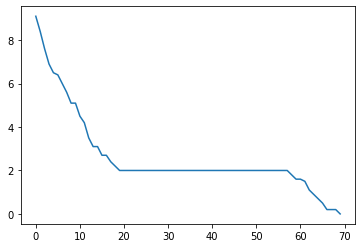

In [188]:
import matplotlib.pyplot as plt

plt.plot(meanXeques)

In [190]:
result[0]

array([3, 1, 7, 5, 0, 2, 4, 6])

In [191]:
casa.getXequesBySolution(result)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [192]:
printSolution(result[0])

Solução
_________________________________
|   |   |   | Q |   |   |   |   |
_________________________________
|   | Q |   |   |   |   |   |   |
_________________________________
|   |   |   |   |   |   |   | Q |
_________________________________
|   |   |   |   |   | Q |   |   |
_________________________________
| Q |   |   |   |   |   |   |   |
_________________________________
|   |   | Q |   |   |   |   |   |
_________________________________
|   |   |   |   | Q |   |   |   |
_________________________________
|   |   |   |   |   |   | Q |   |
_________________________________


## Tabuleiro de 20x20

In [180]:
meanXeques = []
casa = N_Queens()

pop = casa.init_population(12, 20)
repeat = 0
probMut = 0.8

xeques, result=casa.evolutionaryAlgorith(np.array(pop),repeat, probMut)
oldmean = round(np.array(xeques).mean(),1)
i = 0


while True:
    [xeques, result]=casa.evolutionaryAlgorith(np.array(result), repeat, probMut)
    mean = round(np.array(xeques).mean(),1)
    meanXeques.append(mean)
    
    if oldmean != mean:
        oldmean = mean
        repeat = 0
    else:
        repeat = repeat + 1
        
    if  i > 3000 or mean < 0.05:
        break
        
    i = i+ 1

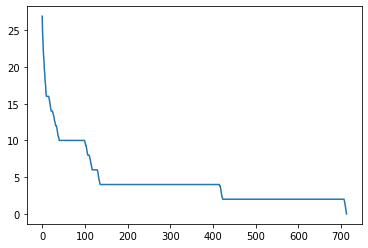

In [181]:
import matplotlib.pyplot as plt

plt.plot(meanXeques)

In [182]:
casa.getXequesBySolution(result)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [184]:
result[0]

array([14,  7,  9, 15,  5, 18,  6, 12, 19, 17,  0,  2,  4,  8, 10, 13,  1,
        3, 11, 16])

In [183]:
printSolution(result[0])

Solução
_________________________________________________________________________________
|   |   |   |   |   |   |   |   |   |   |   |   |   |   | Q |   |   |   |   |   |
_________________________________________________________________________________
|   |   |   |   |   |   |   | Q |   |   |   |   |   |   |   |   |   |   |   |   |
_________________________________________________________________________________
|   |   |   |   |   |   |   |   |   | Q |   |   |   |   |   |   |   |   |   |   |
_________________________________________________________________________________
|   |   |   |   |   |   |   |   |   |   |   |   |   |   |   | Q |   |   |   |   |
_________________________________________________________________________________
|   |   |   |   |   | Q |   |   |   |   |   |   |   |   |   |   |   |   |   |   |
_________________________________________________________________________________
|   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   | Q |   |
________

## Tabuleiro de 50x50

In [194]:
meanXeques = []
casa = N_Queens()

pop = casa.init_population(12, 50)
repeat = 0
probMut = 0.8

xeques, result=casa.evolutionaryAlgorith(np.array(pop),repeat, probMut)
oldmean = round(np.array(xeques).mean(),1)
i = 0


while True:
    [xeques, result]=casa.evolutionaryAlgorith(np.array(result), repeat, probMut)
    mean = round(np.array(xeques).mean(),1)
    meanXeques.append(mean)
    
    if oldmean != mean:
        oldmean = mean
        repeat = 0
    else:
        repeat = repeat + 1
        
    if  i > 10000 or mean < 0.05 :
        break
        
    i = i+ 1

In [195]:
casa.getXequesBySolution(result)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [196]:
result[0]

array([42, 12, 30, 28, 33, 18, 20, 43, 10, 40, 17, 34, 39, 21, 15, 45,  4,
        0,  7, 24, 13, 27, 41, 32, 46,  3, 38, 11,  2, 25,  9, 16, 48, 36,
        1,  6, 22, 29, 37, 14, 31, 35, 23, 19, 44, 49, 26,  5,  8, 47])

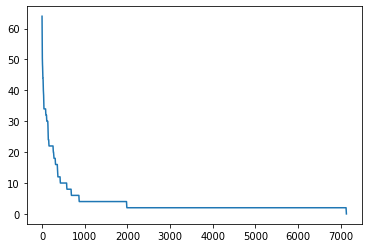

In [197]:
plt.plot(meanXeques)

## Considerações finais
Como foi observado nos gráficos, quanto maior o valor da dimensão do tabuleiro, mais dificil fica a questão da
solução do problema do remanejamento das rainhas no tabuleiro. No caso de um tabuleiro com com 50 posições, foi necessário rodar o programa 7000 vezes para que conseguisse alcançar o mínimo global, ou seja, colocar 50 rainhas em um tabuleiro sem que nenhuma dessas estiverem em check, tendo assim um resultado de 0 cheques. Portanto, o objetivo do trabalho foi alcançado com sucesso.